# Word2Vec for Song and Location Recommendations
- Inspired by Chapter 2 of "Hands-On LLMs" by Jay Alammar & Maarten Grootendorst
- Extended with travel location embeddings and similarity demos

# Part 1: Song Recommendation using Word2Vec

In [16]:
import pandas as pd
from urllib import request
from gensim.models import Word2Vec
import numpy as np

# Load playlist data (each line is a list of song IDs)
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')
lines = data.read().decode('utf-8').split('\n')[2:]
# Parse playlists, keeping only those with 2+ songs
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]

# Load song metadata (song ID to title + artist)
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode('utf-8').split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]
songs_df = pd.DataFrame(data=songs, columns= ['id','title','artist'])
songs_df.set_index('id', inplace=True)

# Train Word2Vec model on playlists
model = Word2Vec(playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4)
wv = model.wv

# Recommend similar songs
def print_recom(song_id):
    similar_songs = np.array(model.wv.most_similar(positive=str(song_id),topn=5))[:,0]
    return songs_df.iloc[similar_songs]

# Example usage: recommend similar songs to song_id 2172
print('Chosen song: ', songs_df.iloc[2172])
print('\n')
print('Recomendations:')
print_recom("2172")

Chosen song:  title     Fade To Black
artist        Metallica
Name: 2172 , dtype: object


Recomendations:


,title,artist
id,,
2849,Run To The Hills,Iron Maiden
3167,Unchained,Van Halen
3126,Heavy Metal,Sammy Hagar
5586,The Last In Line,Dio
2976,I Don't Know,Ozzy Osbourne


# Part 2: Simulated Location Embeddings using Word2Vec

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

# Simulated travel sequences — like trips through a city
travel_sequences = [
    ["zone_home", "tram_stop_A", "university"],
    ["zone_home", "bus_stop_B", "downtown", "gym"],
    ["gym", "zone_home"],
    ["hotel", "Old_Town", "museum", "cafe"],
    ["zone_home", "tram_stop_A", "downtown", "cafe"],
    ["hotel", "museum", "gallery", "zone_home"],
    ["zone_home", "bakery", "work"],
    ["work", "lunch_spot", "work", "gym"],
    ["home_2", "bus_stop_B", "university"],
    ["zone_home", "market", "bakery"],
]

# Train Word2Vec model on travel data
travel_model = Word2Vec(sentences=travel_sequences, vector_size=16, window=3, min_count=1, workers=2, seed=42)
twv = travel_model.wv

# Check which places are most similar to "zone_home"
similar_to_home = twv.most_similar("zone_home", topn=5)
print("Most similar to 'zone_home':", similar_to_home)

Most similar to 'zone_home': [('bakery', 0.3623064160346985), ('gym', 0.3613920509815216), ('lunch_spot', 0.22103112936019897), ('tram_stop_A', 0.11499296128749847), ('home_2', 0.09866371750831604)]


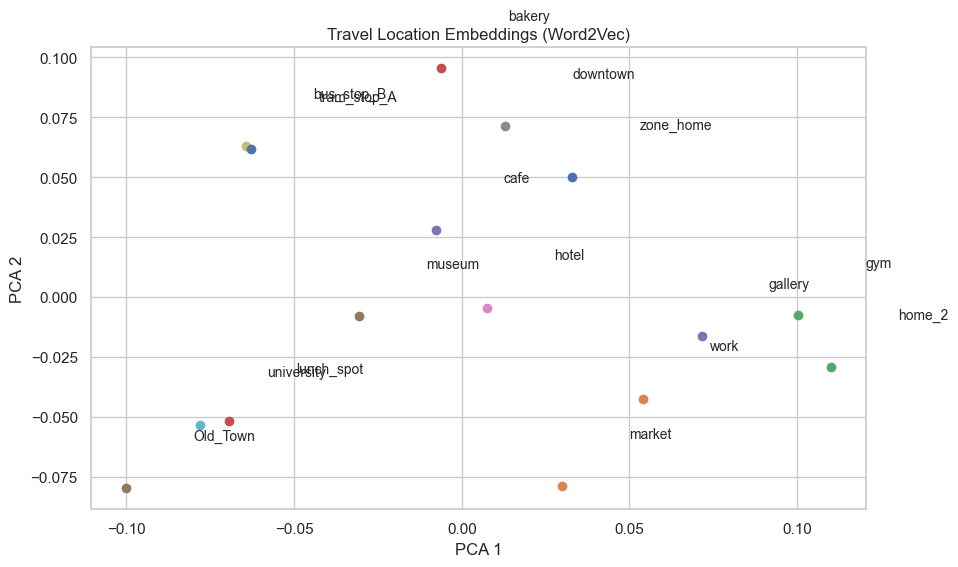

In [18]:
# Reduce embeddings to 2D for plotting
places = list(twv.key_to_index.keys())
embeddings = [twv[place] for place in places]

pca = PCA(n_components=2)
points_2d = pca.fit_transform(embeddings)

# Visualize location embeddings in 2D
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
for i, label in enumerate(places):
    x, y = points_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, label, fontsize=10)
plt.title("Travel Location Embeddings (Word2Vec)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()